# EDA (Análisis Exploratorio de Datos)

## Introducción
En este notebook llevaremos a cabo un Análisis Exploratorio de Datos (EDA) utilizando el dataset de juegos y reseñas. Ya se ha realizado un proceso de ETL previo que incluyó la eliminación de valores nulos y duplicados, así como la conversión de tipos de datos. A continuación, se detallan los pasos que seguiremos en este EDA:

### Pasos del EDA
1. **Chequeo de Valores Nulos**:
    - Valores nulos ya eliminados en el proceso de ETL.

2. **Detección de Valores Duplicados**:
    - Valores duplicados ya eliminados en el proceso de ETL.

3. **Identificación de Valores Faltantes**:
    - Ya gestionado en el proceso de ETL, filas con valores vacíos han sido eliminadas o reemplazadas donde corresponde.

4. **Verificación de Tipos de Datos**:
    - Tipos de datos ya verificados y convertidos correctamente durante el ETL.

5. **Análisis Estadístico Descriptivo**:
    - Realización de estadísticas descriptivas para entender la distribución de las variables.

6. **Análisis de Correlaciones Bivariadas y Multivariadas**:
    - Evaluación de correlaciones entre variables numéricas y visualización mediante heatmaps.

7. **Visualizaciones**:
    - Creación de gráficos y diagramas para visualizar la distribución de los datos y las relaciones entre variables.

## Análisis Estadístico Descriptivo
Vamos a generar estadísticas descriptivas para las columnas clave de nuestros datasets.


In [40]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [41]:
# Cargamos los archivos parquet
recomendacion = pd.read_parquet('recomendacionjuego.parquet')  # endpoint 6/similitud del coseno
games = pd.read_parquet('random_sample.parquet')  # muestra aleatoria de steam games
reviews = pd.read_parquet('random_sample_reviews.parquet')  # muestra aleatoria de reviews
items = pd.read_parquet('australian_users_items.parquet')  # muestra aleatoria de items

### Valores Atípicos en los Precios de los Juegos

count    30000.000000
mean         8.376778
std         11.594956
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        199.990000
Name: precio, dtype: float64


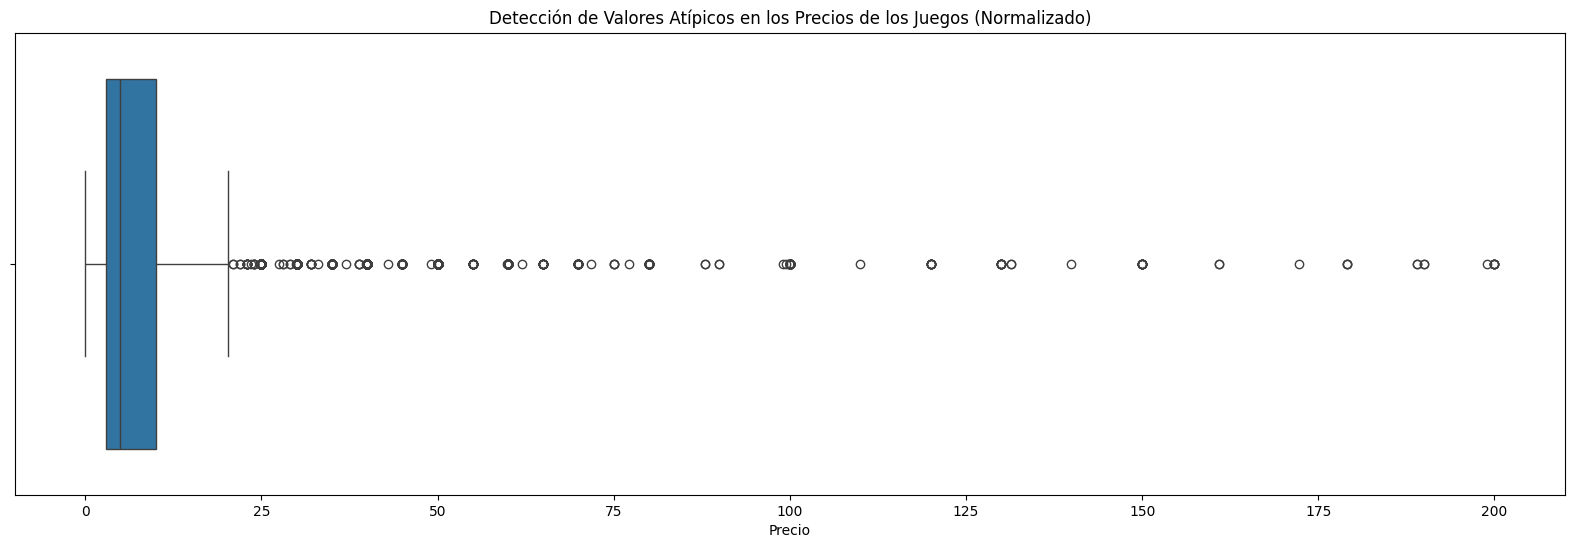

In [48]:
# Normalizar precios altos
games.loc[games['precio'] > 200, 'precio'] = games['precio'] / 10
print(games['precio'].describe())

plt.figure(figsize=(20, 6))
sns.boxplot(x=games['precio'])
plt.title('Detección de Valores Atípicos en los Precios de los Juegos (Normalizado)')
plt.xlabel('Precio')
plt.show()


Nos permite identificar valores atípicos en los precios de los juegos. La mayoría de los juegos se encuentran en el rango de precios bajos, seguramente porque hay una porción importante que son gratuitos o con cierta gratuidad, pero luego muchos tienen precios accesibles. Eso puede ser una estrategia de mercado enfocada al volumen de ventas en precios de margen más chico que en lugar de juegos caros que poca difusión tedrían. En cuanto al par de valores por arriba podria ser o bien realmente su precio o deberse a errores de carga.

### Relación entre Fecha de Lanzamiento y Precio

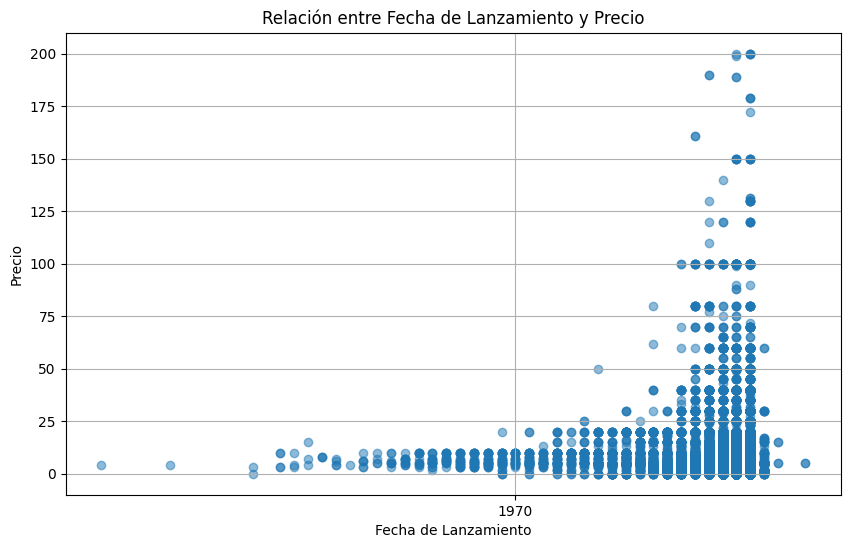

In [50]:
# Convertir 'fecha' a datetime y extraer el año
games['fecha'] = pd.to_datetime(games['fecha'], errors='coerce')

# Filtrar años dentro del rango 1960 - 2023
filtered_games = games[(games['fecha'].dt.year >= 1960) & (games['fecha'].dt.year <= 2023)]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(filtered_games['fecha'], filtered_games['precio'], alpha=0.5)
plt.title('Relación entre Fecha de Lanzamiento y Precio')
plt.xlabel('Fecha de Lanzamiento')
plt.ylabel('Precio')
plt.grid(True)
plt.show()


Se nota que ha ido en aumento los precios a lo largo del tiempo de manera casi exponencial. Esto puede deberse a muchisimas causas como ser: inflación (no únicamente en Argentina o Venezuela), aumento de la popularidad de juegos y por ende mayor demanda en su lanzamiento con el consiguiente aumento de precio, y por último estrategias de marketing y la misma modernidad en la que se compra y consume todo en el momento (recordemos que es fecha de lanzamiento y no precio de un producto a lo largo de los años).

### Top 10 Desarrolladores con Más Juegos:

Identificar a los desarrolladores que han lanzado más juegos.

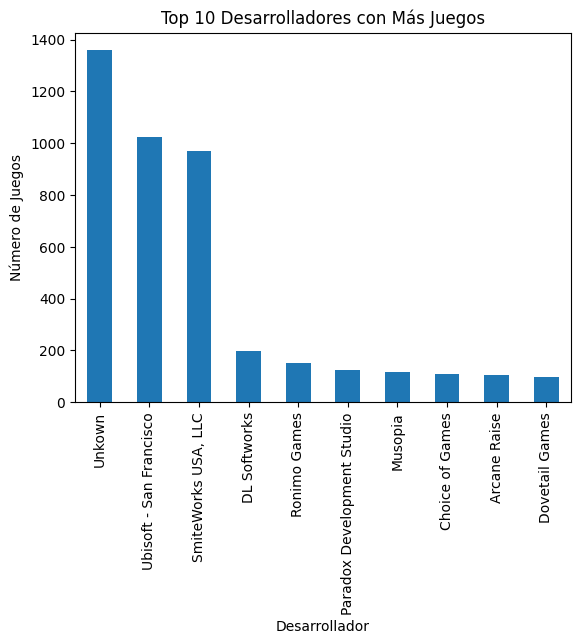

In [42]:
top_developers = games['desarrollador'].value_counts().head(10)
top_developers.plot(kind='bar')
plt.title('Top 10 Desarrolladores con Más Juegos')
plt.xlabel('Desarrollador')
plt.ylabel('Número de Juegos')
plt.show()


Podemos ver que la mayor cantidad de juegos desarrollados no tiene registrado a su desarrollado. Esto puede deberse a multiples causas como ser errores al ingresar la data (el mas comun), datos faltantes desde el origen (es decir que nunca se informó el desarrollador quizas por la plataforma en la que se desarrolla). Luego de eso se notan 2 grandes lideres del mercado: Ubisoft y SmiteWorks.


### Analisis de Sentimiento

In [43]:
# Filtrar solo los valores válidos (0, 1, 2)
valid_sentiments = reviews[reviews['analisis_de_sentimientos'].isin([0, 1, 2])]

# Contar las reseñas válidas
sentiment_counts = valid_sentiments['analisis_de_sentimientos'].value_counts()
print(sentiment_counts)


analisis_de_sentimientos
2    17356
1     8925
0     3719
Name: count, dtype: int64


analisis_de_sentimientos
2    17356
1     8925
0     3719
Name: count, dtype: int64


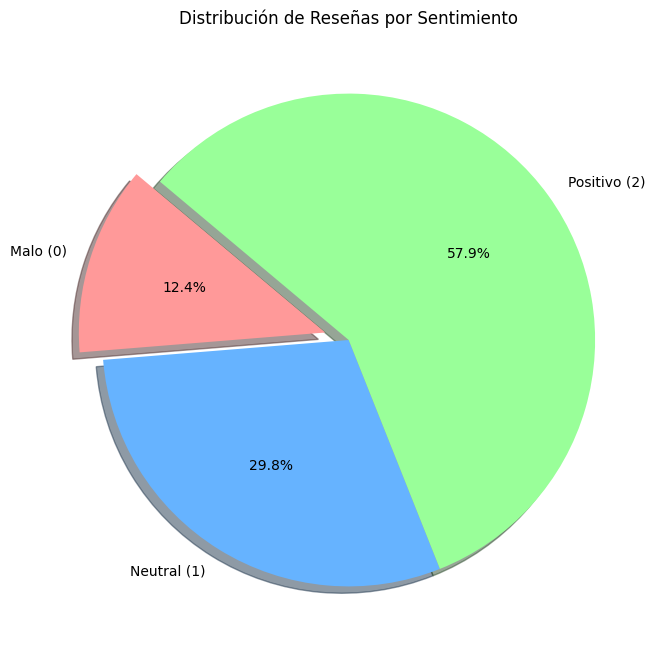

In [44]:
# Contar las reseñas con análisis de sentimiento 0, 1 y 2
sentiment_counts = reviews['analisis_de_sentimientos'].value_counts()
print(sentiment_counts)

# Crear el pie chart solo si existen valores
if sentiment_counts.sum() > 0:
    labels = ['Malo (0)', 'Neutral (1)', 'Positivo (2)']
    sizes = [sentiment_counts.get(0, 0), sentiment_counts.get(1, 0), sentiment_counts.get(2, 0)]
    colors = ['#ff9999', '#66b3ff', '#99ff99']
    explode = (0.1, 0, 0)  # para resaltar la primera porción

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Distribución de Reseñas por Sentimiento')
    plt.show()
else:
    print("No hay datos disponibles para crear el gráfico.")


Vemos que hay con diferencia más positivos. Eso puede deberse a  un cierto sesgo donde tratandose de una comunidad reducida suele haber participación de aquellos que se sienten mas comprometidos con los juegos, así como también depende de la calidad de los juego (los cuales gracias al avance tecnologico van mejorando en performance, diseño y complejidad). Aún asi un 12,4% de negativo es un dato que debería generar ciertas aciones de parte de los creadores, marketing, etc

### Géneros y Cantidad de Usuarios
Podemos contar el número de usuarios que han jugado cada género y visualizarlo con un gráfico de barras.

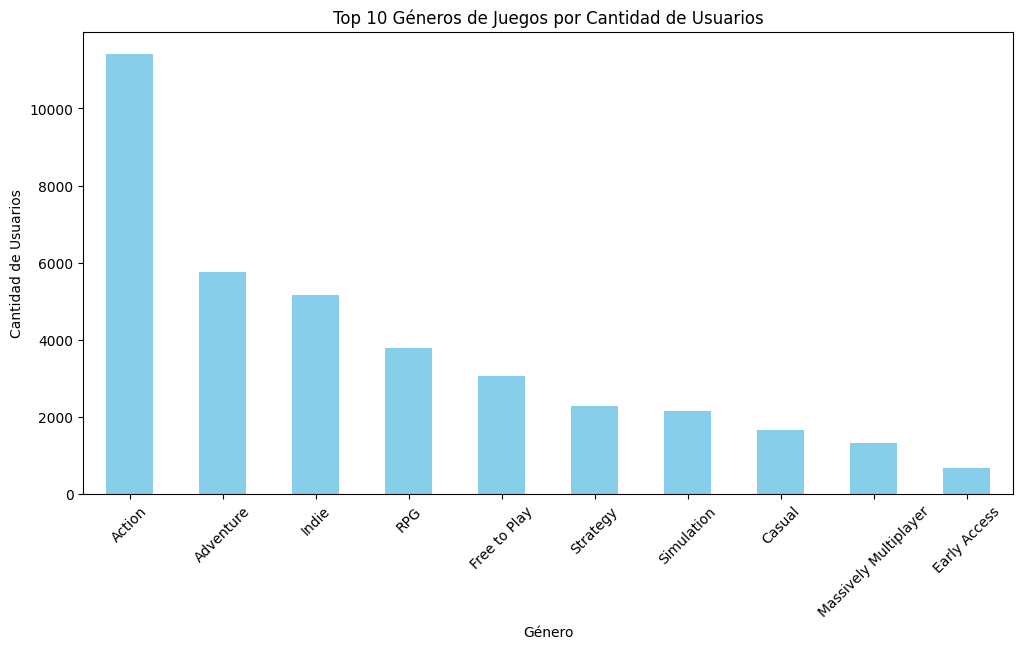

In [45]:
game_genres = items.merge(games[['id_steam', 'genero']], left_on='id_item', right_on='id_steam', how='inner')

# Contar la cantidad de usuarios por género
users_by_genre = game_genres.groupby('genero')['id_usuario'].nunique().sort_values(ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
users_by_genre.plot(kind='bar', color='skyblue')
plt.title('Top 10 Géneros de Juegos por Cantidad de Usuarios')
plt.xlabel('Género')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45)
plt.show()



El género action es el más jugado con amplia ventaja, podria ser debido a muchas causas, marketing, emoción, e incluso a que suele jugarse con multijugadores.

### Análisis de la Evolución del Precio de los Juegos


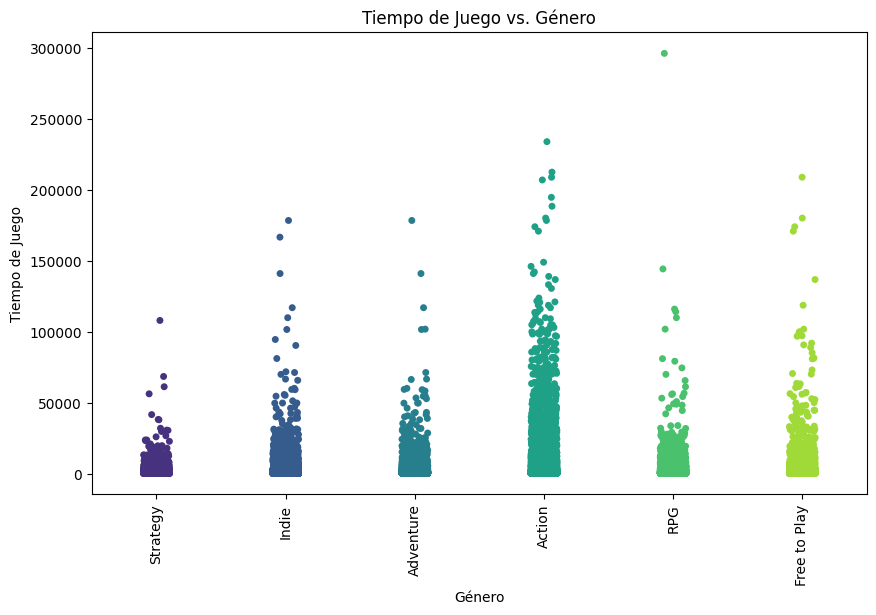

In [54]:
selected_genres = ['Action', 'Adventure', 'RPG', 'Strategy', 'Indie', 'Free to Play']

# Filtrar el DataFrame
filtered_df = items.merge(games[['id_steam', 'genero']], left_on='id_item', right_on='id_steam', how='inner')
filtered_df = filtered_df[filtered_df['genero'].isin(selected_genres)]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.stripplot(x='genero', y='tiempo_total_de_juego', data=filtered_df, palette='viridis', hue='genero')
plt.xlabel('Género')
plt.ylabel('Tiempo de Juego')
plt.title('Tiempo de Juego vs. Género')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para que sean legibles
plt.show()


Los géneros de juegos como Action, Indie y Free to Play tienden a tener jugadores con tiempos de juego muy altos, mientras que Adventure y RPG parecen tener jugadores con tiempos de juego generalmente intermedio y Strategy tienen una dispersión más baja.

Existen outliers significativos en géneros como Action, Indie, RPG,  y Free to Play lo que sugiere que pueden haber errores de medición en estos puntos o algunos jugadores dedican una cantidad excesiva de tiempo a estos géneros.

Por último, los géneros con mayor dispersión (Action, Indie, RPG y Free to play) presentan mayor variabilidad en los hábitos de juego de los jugadores a diferencia de por ejemplo, Adventure, que indica que los tiempos de juego de los jugadores son más uniformes.

### Distribución de Precios por Género

C:\Users\MegaTecnologia\AppData\Local\Temp\ipykernel_23968\1401045331.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genero', y='precio', data=filtered_games, palette='viridis')


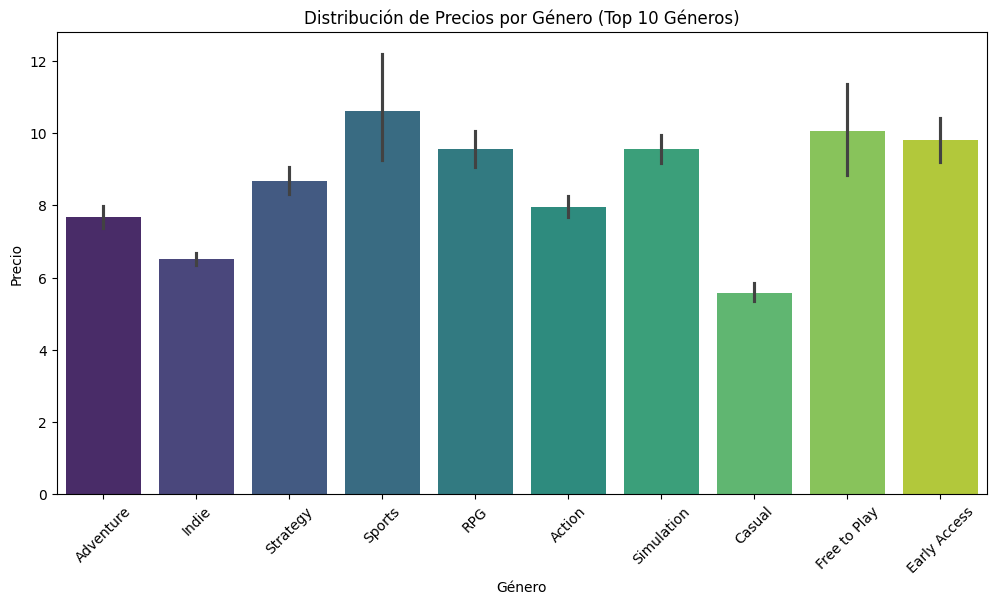

In [63]:

top_10_genres = games['genero'].value_counts().head(10).index

# Filtrar el DataFrame para solo incluir estos géneros
filtered_games = games[games['genero'].isin(top_10_genres)]

# Crear el gráfico de barras para precios por género
plt.figure(figsize=(12, 6))
sns.barplot(x='genero', y='precio', data=filtered_games, palette='viridis')
plt.title('Distribución de Precios por Género (Top 10 Géneros)')
plt.xlabel('Género')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()



Insights: Podemos ver cómo se distribuyen los precios dentro de cada género, identificando si algunos géneros tienden a tener juegos más baratos o más caros.

### Mapa de palabras de: Juegos Más Jugados

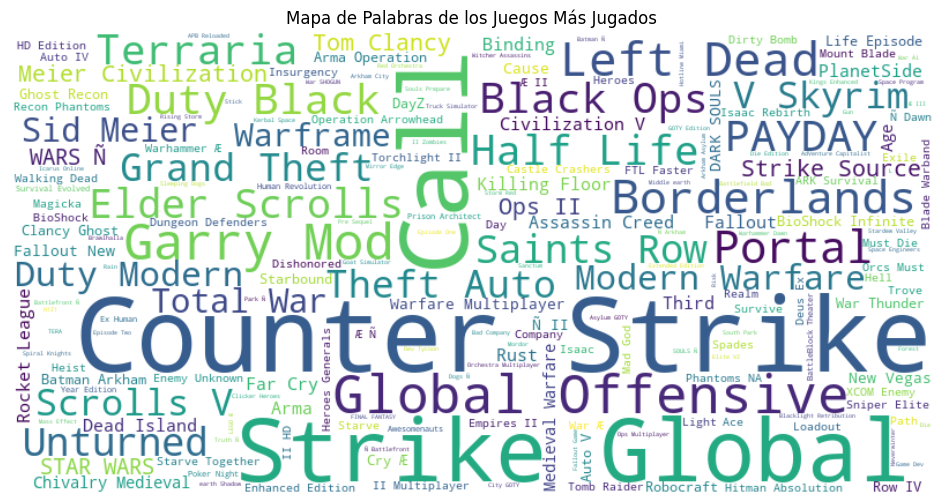

In [64]:
from wordcloud import WordCloud

# Concatenar los nombres de los juegos más jugados
text = ' '.join(items['nombre_de_item'].values)

# Crear el mapa de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar el mapa de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mapa de Palabras de los Juegos Más Jugados')
plt.show()


El mapa de palabras muestra una representación visual de los títulos de los juegos más jugados. Los nombres de los juegos que se juegan con más frecuencia aparecen más grandes y en negrita. Resalta Counter Strike, Strike Global y Call